In [32]:
library(rvest)
library(tidyverse)
library(repr)
library(readxl)
library(tidymodels)
options(repr.matrix.max.rows = 10)

Rows: 918 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope
dbl (7): Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak, HeartDisease

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,num_people,average_bp,average_chol
<dbl>,<int>,<dbl>,<dbl>
31,1,-0.6615748,0.730015611
32,4,-1.0991666,0.570556191
34,3,-0.7892057,-0.551565653
35,7,-0.4193364,0.051680301
36,5,-0.5302972,-0.008813035
⋮,⋮,⋮,⋮
65,13,0.37770591,-0.1476926
66,6,0.01304602,-0.3950592
67,10,0.11515079,0.2162019


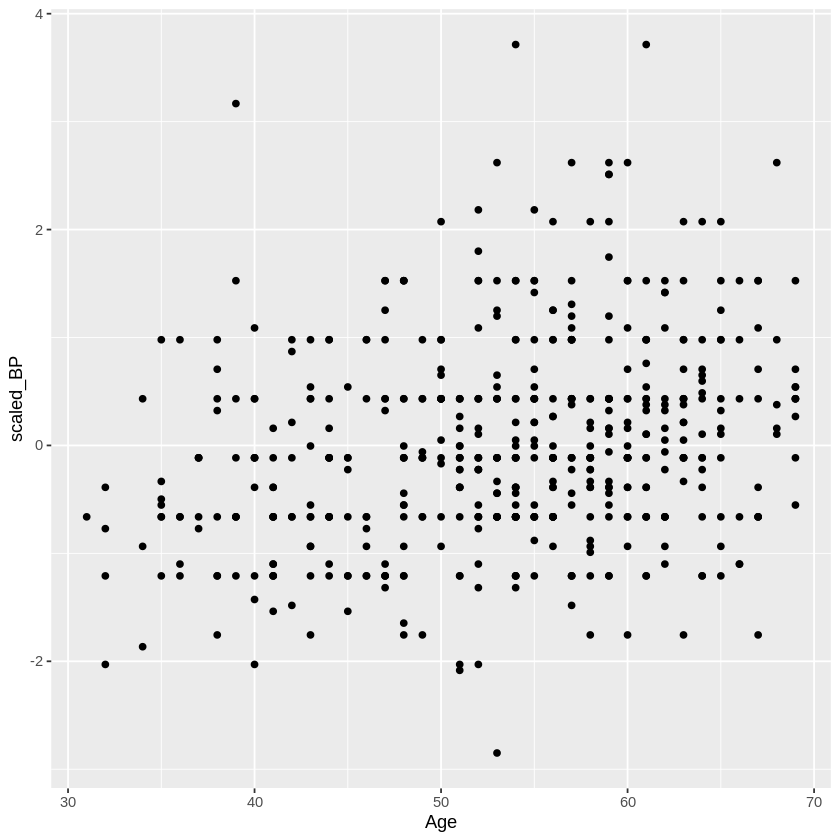

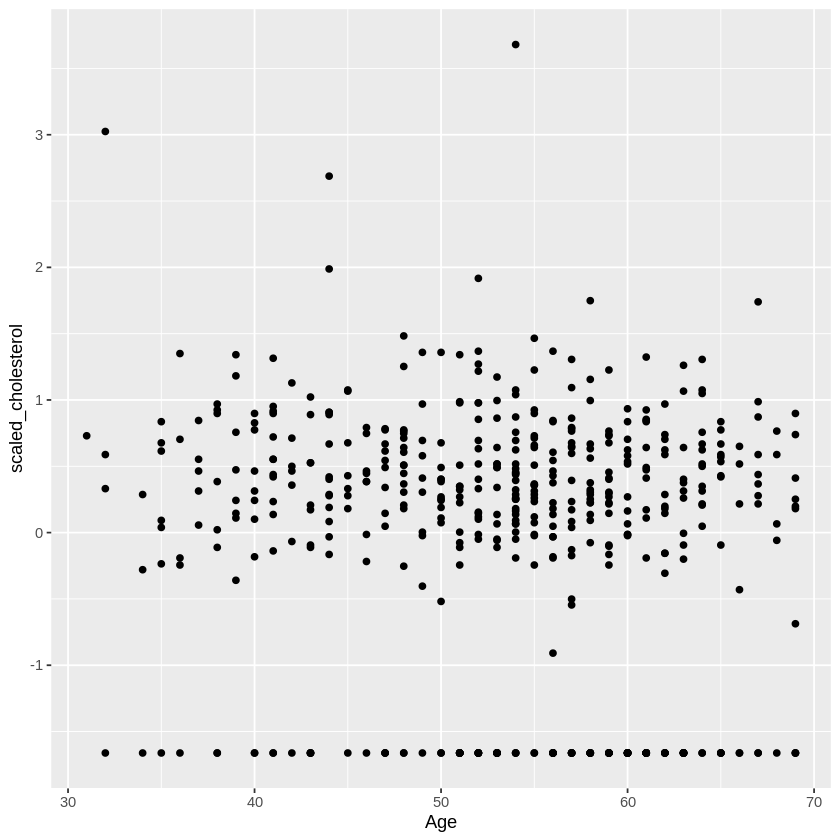

In [35]:
## Preliminary exploratory data analysis
heart_data <- read_csv("heart.csv") |>
    select(Age, Sex, RestingBP, Cholesterol, HeartDisease) |>
    filter(Sex == "M", Age > 30, Age < 70) |>
    mutate(HeartDisease = as.factor(HeartDisease)) |>
    arrange(Age)


scaled_heart_data <- heart_data |>
    mutate(scaled_age = scale(Age, center = TRUE), 
           scaled_BP = scale(RestingBP, center = TRUE),
           scaled_cholesterol = scale(Cholesterol, center = TRUE)) |>
    select(Age, scaled_age, scaled_BP, scaled_cholesterol, HeartDisease)


set.seed(0)
heart_split <- initial_split(scaled_heart_data, prop = 0.75, strata = HeartDisease)  
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

train_table <- heart_train |>
    group_by(Age) |>
    summarize(num_people = n(),
              average_bp = mean(scaled_BP), 
              average_chol = mean(scaled_cholesterol))
train_table

viz_bp <- heart_train |>
    ggplot(aes(x = Age, y = scaled_BP)) +
        geom_point()
viz_bp

viz_chol <- heart_train |>
    ggplot(aes(x = Age, y = scaled_cholesterol)) +
        geom_point()
viz_chol
              